In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils import time_series_split

In [4]:
df = pd.read_csv('../data/processed/pollutants_with_features.csv')

# Feature / target split
X_cols = [
"NO2 Mean",
"O3 Mean",
"SO2 Mean",
"CO Mean",
'SO2_Mean_Imputed', 
'CO_Mean_Imputed',
"NO2_to_SO2",
"CO_to_SO2",
"O3_to_CO",
'NO2 Mean_roll_3',
'O3 Mean_roll_3',
'SO2 Mean_roll_3',
'CO Mean_roll_3',
"year",
"month",
"is_weekend",
]
y_cols = ["NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"]

# Temporal split
train_df, val_df, test_df = time_series_split(df)

X_train, y_train = train_df[X_cols].values, train_df[y_cols].values
X_val, y_val = val_df[X_cols].values, val_df[y_cols].values
X_test, y_test = test_df[X_cols].values, test_df[y_cols].values

In [5]:
df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'SO2_Mean_Imputed', 'CO_Mean_Imputed', 'year', 'month', 'day',
       'weekday', 'is_weekend', 'NO2_to_SO2', 'CO_to_SO2', 'O3_to_CO',
       'NO2 Mean_roll_3', 'O3 Mean_roll_3', 'SO2 Mean_roll_3',
       'CO Mean_roll_3'],
      dtype='object')

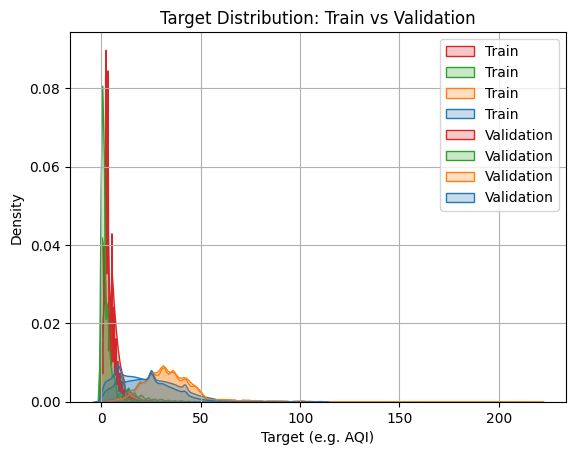

In [6]:
sns.kdeplot(y_train, label='Train', fill=True)
sns.kdeplot(y_val, label='Validation', fill=True)
plt.title('Target Distribution: Train vs Validation')
plt.xlabel('Target (e.g. AQI)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_train_pred = np.load("../models/preds/y_train_pred.npy")
y_val_pred = np.load("../models/preds/y_val_pred.npy")
y_train = np.load("../models/preds/y_train.npy")
y_val = np.load("../models/preds/y_val.npy")

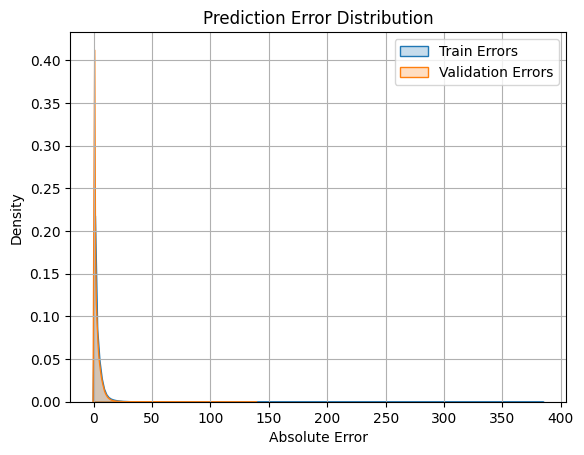

In [8]:
# Compute absolute errors
train_errors = abs(y_train_pred.flatten() - y_train.flatten())
val_errors = abs(y_val_pred.flatten() - y_val.flatten())

# Plot
sns.kdeplot(train_errors, label='Train Errors', fill=True)
sns.kdeplot(val_errors, label='Validation Errors', fill=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Absolute Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

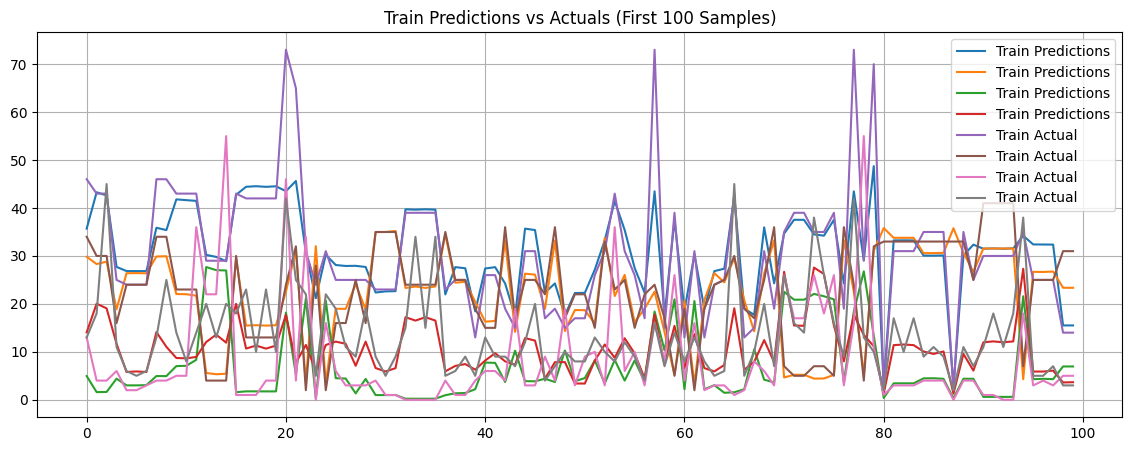

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(y_train_pred[:100], label='Train Predictions')
plt.plot(y_train[:100], label='Train Actual')
plt.title('Train Predictions vs Actuals (First 100 Samples)')
plt.legend()
plt.grid(True)
plt.show()